# **MINPRO 4**


## TASK 1 ( Customer Type and Behaviour Analysis on Advertisement)

### Load Dataset

In [167]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


In [168]:
import numpy as np 
import pandas as pd
import seaborn as sns
import ppscore as pps
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [169]:
df=pd.read_csv('Clicked Ads Dataset.csv')
pd.set_option('display.max_columns',None)
df.head(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
5,5,59.99,23,418330920.0,226.74,Laki-Laki,5/19/2016 14:30,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel
6,6,88.91,33,376969950.0,208.36,Perempuan,1/28/2016 20:59,No,Bandung,Jawa Barat,Electronic
7,7,66.00,48,172153310.0,131.76,Laki-Laki,3/7/2016 1:40,Yes,Bandar Lampung,Lampung,Health
8,8,74.53,30,482034000.0,221.51,Laki-Laki,4/18/2016 9:33,No,Batam,Kepulauan Riau,Bank
9,9,69.88,20,389496240.0,183.82,Laki-Laki,7/11/2016 1:42,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Health


### Descriptive Statistics

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [171]:
# data types per feature
num=['Unnamed: 0','Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']
cat=['Male','Clicked on Ad','city','province','Timestamp']

In [172]:
#Numerical feature
df[num].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [173]:
# Kategorical feature
df[cat].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
Timestamp,1000,997,5/26/2016 15:40,2


### Univariate Analysis

#### univariate analysis num

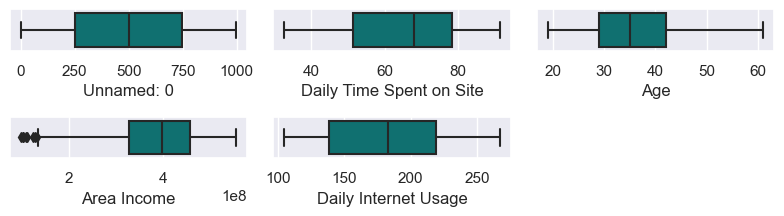

In [174]:

plt.figure(figsize = (8,4))
for i in range(len(num)):
  plt.subplot(4,3, i + 1)
  sns.boxplot(x = df[num[i]], orient = 'h', color='teal' )
  plt.tight_layout()
     

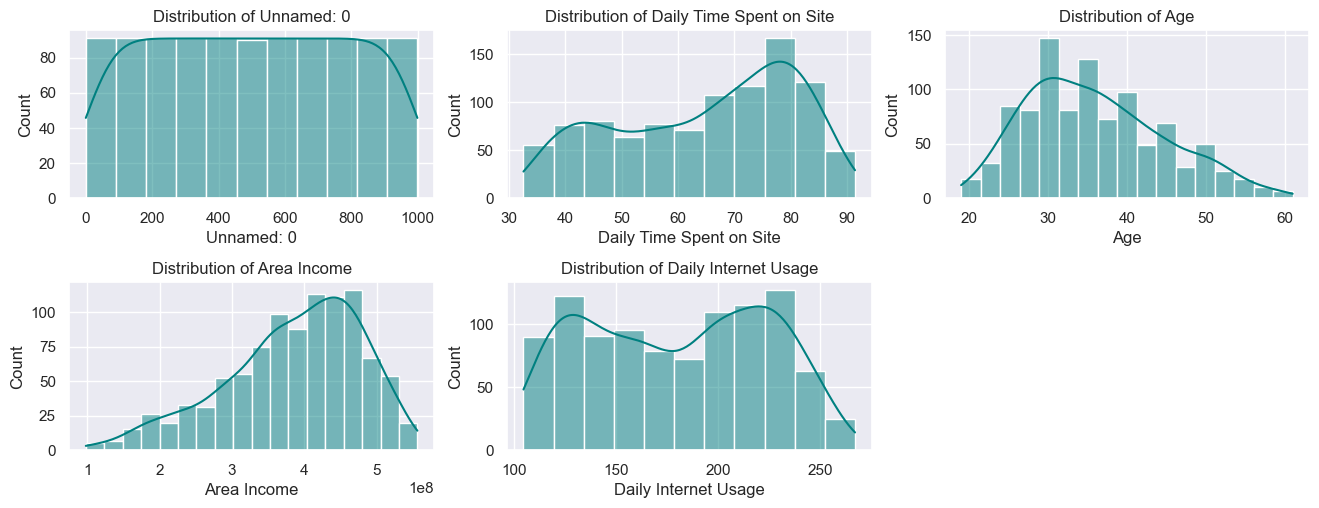

In [175]:

plt.figure(figsize=(16, 12))

for i in range(len(num)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[num[i]], kde=True, color='teal')
    plt.title(f'Distribution of {num[i]}')
    plt.xlabel(num[i])


plt.subplots_adjust(hspace=0.5)

plt.show()

In [176]:
num_2 = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage','Area Income']

#### Observasi
- Fitur Area Income memiliki distribusi negative skewed, artinya kebanyakan customer berpendapatan rendah dibandingkan berpendapatan tinggi.

- Fitur Age memiliki distribusi positive skewed, artinya kebanyakan customer memiliki umur lebih dari 30 tahun dibandingkan customer yang memiliki umur kurang dari itu.

- Feature yang memiliki distribusi normal : Daily Time Spent on Site and Daily Internet Usage

- Feature yang memiliki outlier : Area Income 


#### Univariate terhadap target

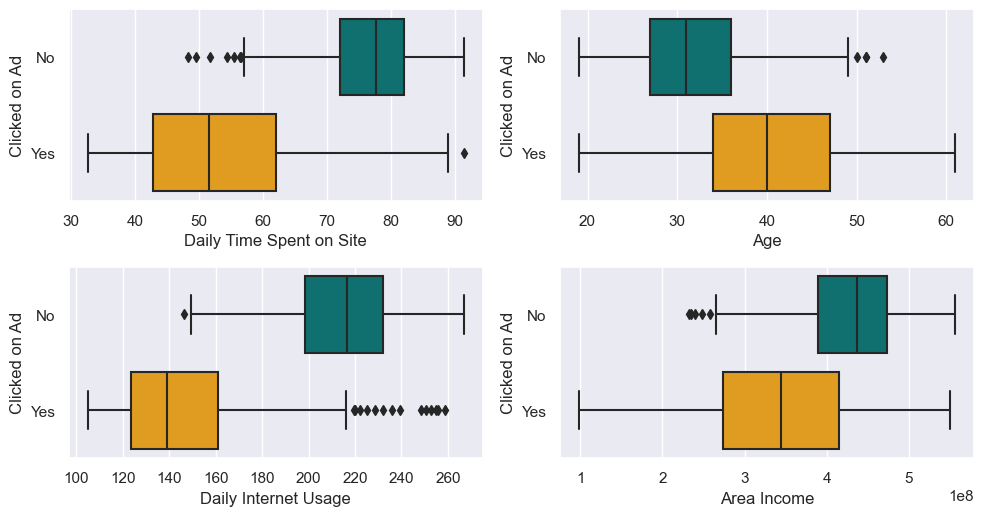

In [177]:
# bivariate analysis: boxplot
colors = sns.color_palette(["teal", "orange"])
plt.figure(figsize = (10,10))
for i in range(len(num_2)):
  plt.subplot(4, 2, i + 1)
  sns.boxplot(x = df[num_2[i]], y = df['Clicked on Ad'], palette=colors)
  plt.tight_layout()

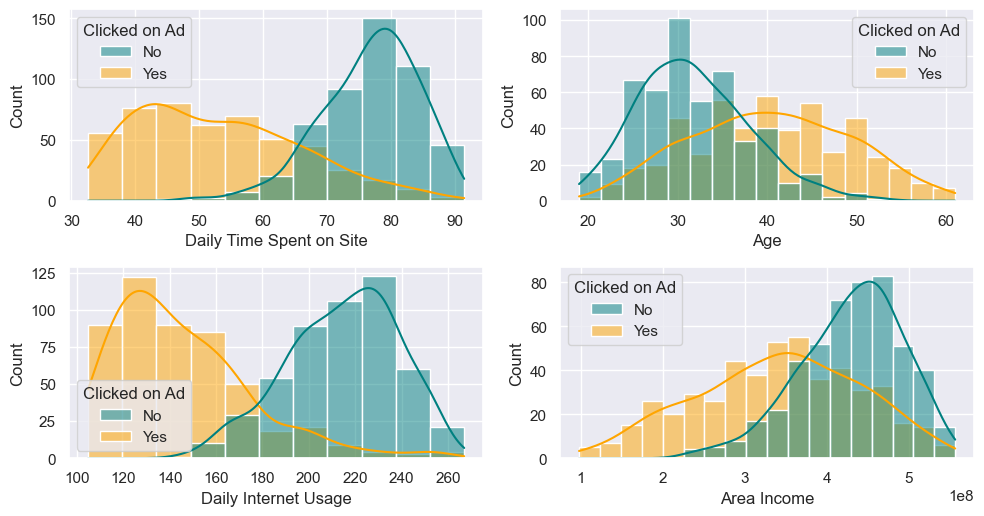

In [178]:

plt.figure(figsize=(10, 10))
plt.tight_layout()

colors = sns.color_palette(["teal", "orange"])

for i in range(0, len(num_2)):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=num_2[i], hue='Clicked on Ad',kde = True, palette=colors)
    plt.xlabel(num_2[i])
    plt.tight_layout()

plt.show()

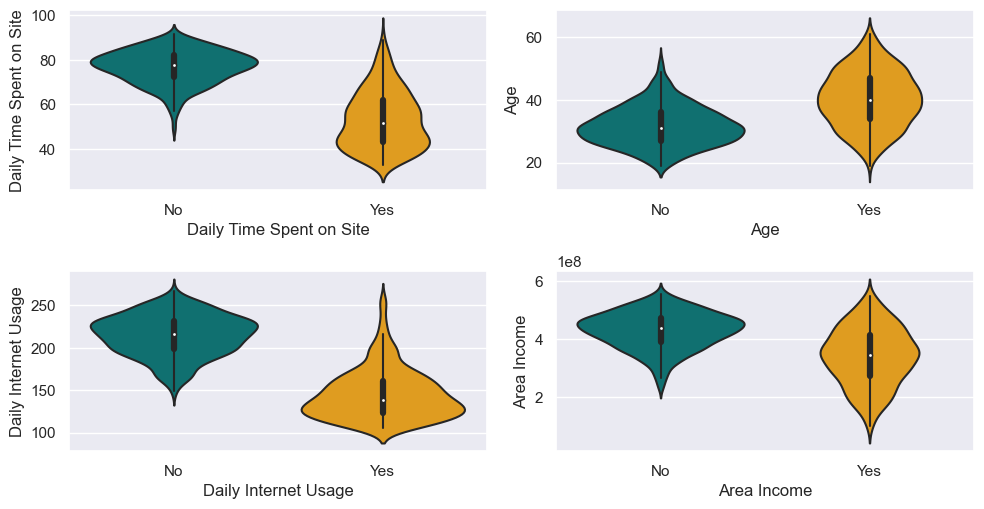

In [179]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
colors = sns.color_palette(["teal", "orange"])

for i in range(0, len(num_2)):
    plt.subplot(4, 2, i+1)
    sns.violinplot(data=df, x='Clicked on Ad', y=num_2[i], palette=colors)
    plt.xlabel(num_2[i])
    plt.tight_layout()

plt.show()

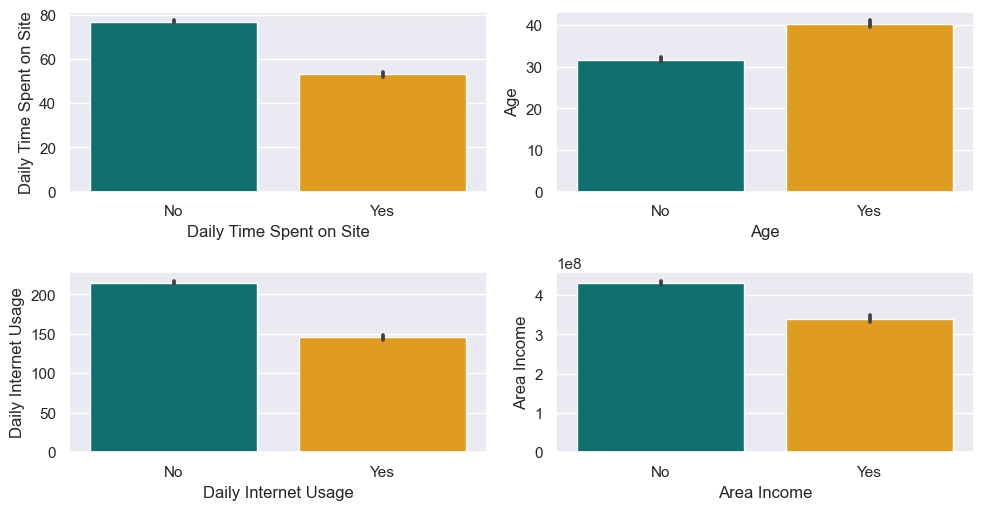

In [180]:

plt.figure(figsize=(10, 10))
colors = sns.color_palette(["teal", "orange"])
for i in range(0, len(num_2)):
    plt.subplot(4, 2, i+1)
    sns.barplot(x='Clicked on Ad', y=num_2[i], data=df, palette=colors)
    plt.xlabel(num_2[i])
    plt.tight_layout()

plt.show()

##### Hasil Observasi
**Daily Time Spent on Site:**

Waktu yang dihabiskan oleh user yang mengklik iklan memiliki distribusi skew kanan artinya waktu yang dihabiskan cenderung sedikit yaitu 40-45 menit. 
Sedangkan waktu yang dihabiskan user yang tidak menklik iklan memiliki distribusi skew kiri artinya waktu yang di habiskan cenderung banyak yaitu 75-80 menit. 

**Usia Pengguna:**

Usia yang mengklik iklan memiliki distribusi normal dengan rata-ratanya adalah 40 tahun. Sedangkan usia user yang tidak mengklik iklan memiliki distribusi skew kanan artinya usian pengguna cenderung lebih muda yaitu di bawah 40 tahun. 

**Daily Internet Usage:**

Penggunaan internet harian untuk user yang mengklik iklan memiliki distribusi skew kanan, artinya penggunaan internet harian user cenderung rendah  yaitu 100-150 menit. Sedangkan penggunaan internet harian untuk user yang tidak mengklik iklan memiliki disribusi skew kiri, artinya penggunaan internet harian user cenderung tinggi yaitu 200-250 menit. 

**Area Income**
Pendapatan wilayah geografis user yang mengklik iklan memiliki distribusi normal, sedangkan pendapatan wilayah geografis user yang tidak mengklik iklan memiliki distribusi skew kiri yang artinya user dengan pendapatan wilayah geografis tinggi. 

#### univariate analysis cat

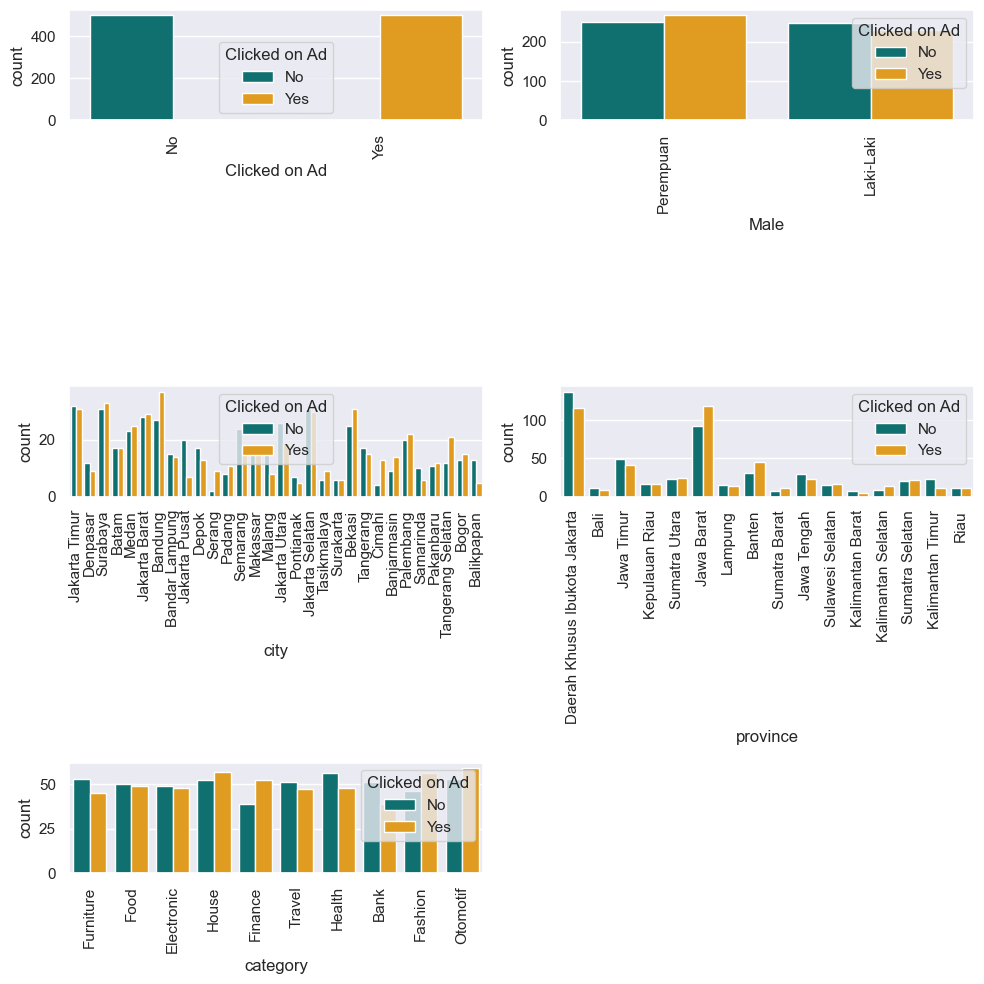

In [181]:
cat_2 = ['Clicked on Ad','Male', 'city', 'province', 'category']

plt.figure(figsize=(10, 10))

for i in range(0, len(cat_2)):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=cat_2[i], hue="Clicked on Ad", palette={"Yes": "orange", "No": "teal"})
    plt.xlabel(cat_2[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

Hasil Observasi**

Jumlah "Yes" dan "No" pada fitur "Clicked on Ad" seimbang. Keseimbangan ini mengindikasikan bahwa dataset memiliki distribusi yang relatif seragam antara pengguna yang mengklik iklan ("Yes") dan yang tidak ("No").

Jumlah perempuan dan laki-laki dalam fitur "Male" tidak terlalu timpang. Ini menunjukkan bahwa dataset memiliki seimbang antara kedua jenis kelamin, yang bisa berguna dalam analisis selanjutnya.


Fitur "Province" didominasi oleh dua nilai utama, yaitu "DKI Jakarta" dan "Jawa Barat". Hal ini menunjukkan bahwa sebagian besar pengguna berasal dari dua provinsi ini, sementara provinsi-provinsi lainnya mungkin memiliki kontribusi yang lebih rendah dalam dataset.

### Bivariate Analysis
- Age vs Daily Internet Usage
- Age vs Daily Time Spent on Site
- Daily internet usage vs daily time on site

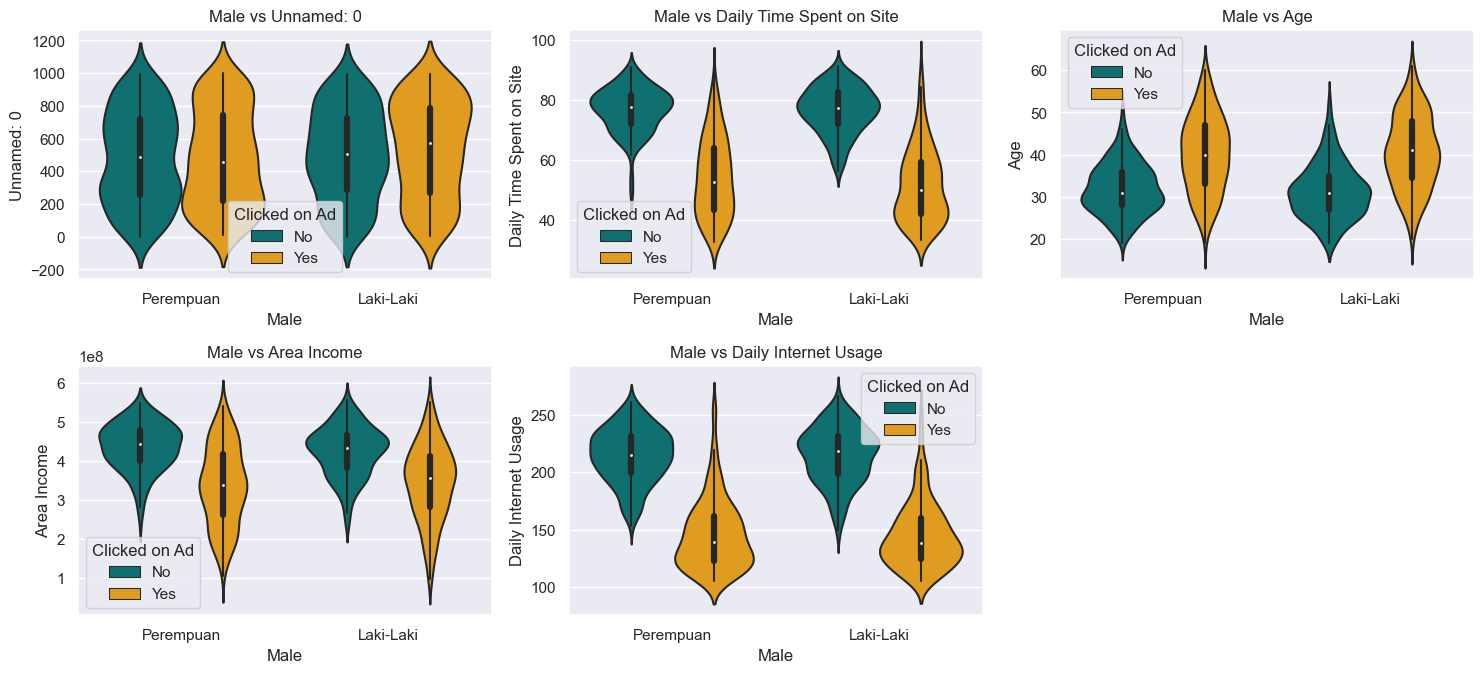

In [182]:
# Categorical-Bivariate Analysis
plt.figure(figsize=(15, 40))

for i, feature in enumerate(num, 1):
    plt.subplot(12, 3, i)
    sns.violinplot(data=df, x='Male', y=feature, hue='Clicked on Ad', palette={"Yes": "orange", "No": "teal"})
    plt.title(f'Male vs {feature}')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

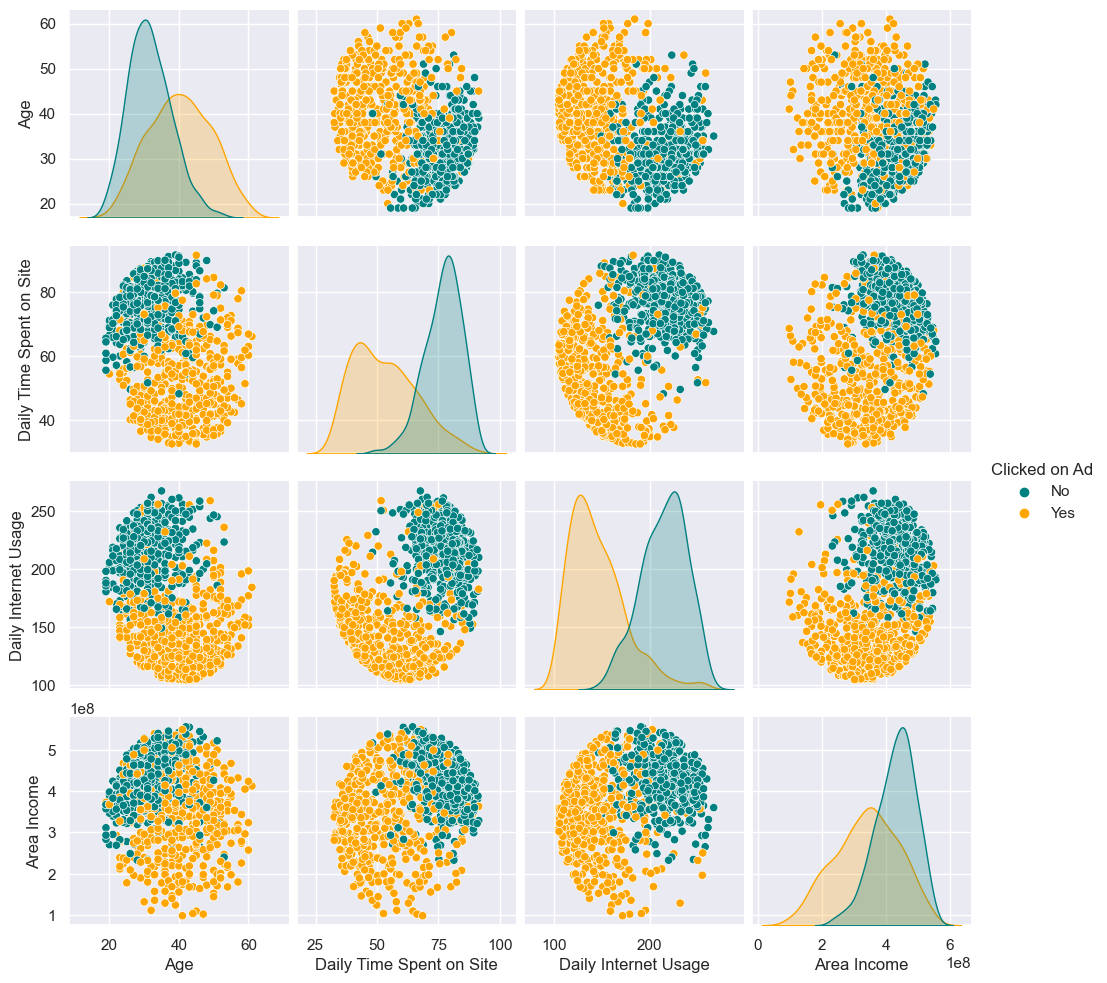

In [183]:
colors = sns.color_palette(["teal", "orange"])
plt.figure(figsize=(10, 10))
sns.pairplot(df[['Age', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income','Clicked on Ad']], diag_kind='kde', hue='Clicked on Ad', palette=colors)
plt.show()

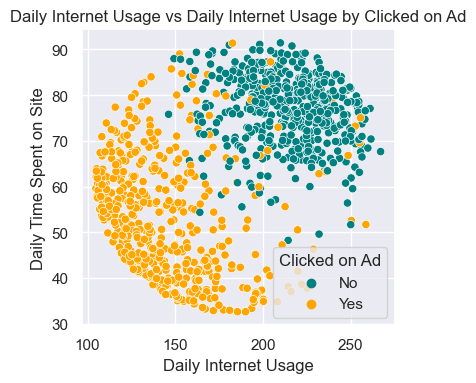

In [184]:
# Daily Internet Usage vs Daily Time Spent on Site
plt.figure(figsize=(4, 4))

sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, hue='Clicked on Ad', palette={"Yes": "orange", "No": "teal"})

# Menambahkan judul dan label
plt.title("Daily Internet Usage vs Daily Internet Usage by Clicked on Ad")
plt.xlabel("Daily Internet Usage")
plt.ylabel("Daily Time Spent on Site")

plt.tight_layout()
plt.show()

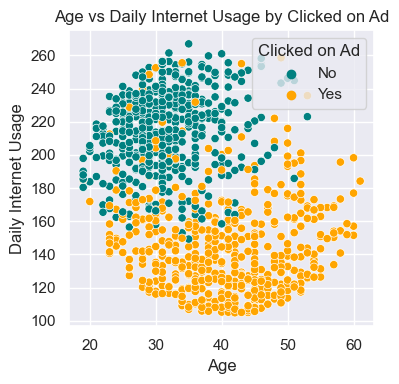

In [185]:
# Age vs Daily Internet Usage
plt.figure(figsize=(4, 4))

sns.scatterplot(x='Age', y='Daily Internet Usage', data=df, hue='Clicked on Ad', palette={"Yes": "orange", "No": "teal"})

# Menambahkan judul dan label
plt.title("Age vs Daily Internet Usage by Clicked on Ad")
plt.xlabel("Age")
plt.ylabel("Daily Internet Usage")

plt.tight_layout()
plt.show()

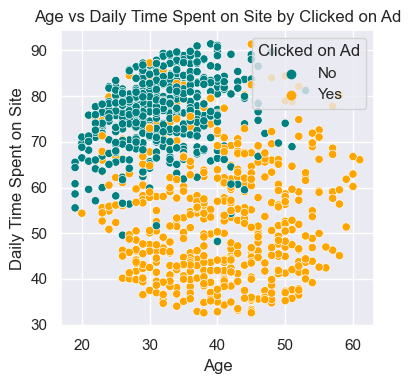

In [186]:
# Age vs Daily Time Spent on Site
plt.figure(figsize=(4, 4))

sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=df, hue='Clicked on Ad', palette={"Yes": "orange", "No": "teal"})

# Menambahkan judul dan label
plt.title("Age vs Daily Time Spent on Site by Clicked on Ad")
plt.xlabel("Age")
plt.ylabel("Daily Time Spent on Site")

plt.tight_layout()
plt.show()

##### Hasil Observasi
User dengan penggunaan internet harian rendah memiliki waktu yang dihabiskan disitus juga rendah yang memiliki kecenderungan untuk mengklik iklan,  sedangkan user dengan penggunaan internet harian tinggi memiliki waktu yang dihabiskan di situs juga tinggi memiliki kecenderungna untuk tidak mengklik iklan. 

User dengan usia yang lebih tua, penggunaan internet harian yang lebih rendah, dan waktu yang dihabiskan di situs yang lebih rendah cenderung untuk mengklik iklan. 

User dengan usia yang lebih muda, penggunaan internet harian tinggi, dan waktu yang dihabiskan di situs juga tinggi memiliki kecenderungan untuk tidak mengklik iklan.



### Multivariate analysis 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18372\800983538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


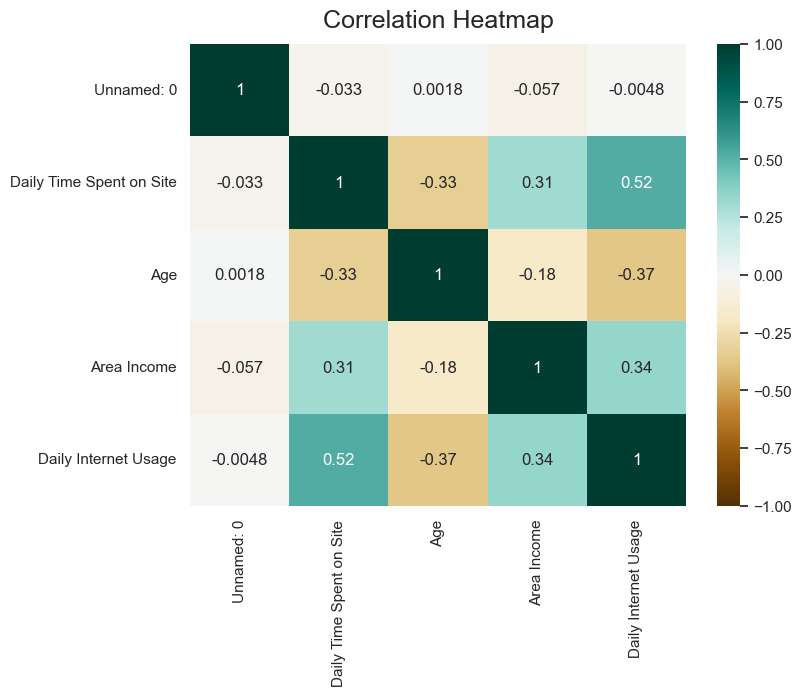

In [187]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

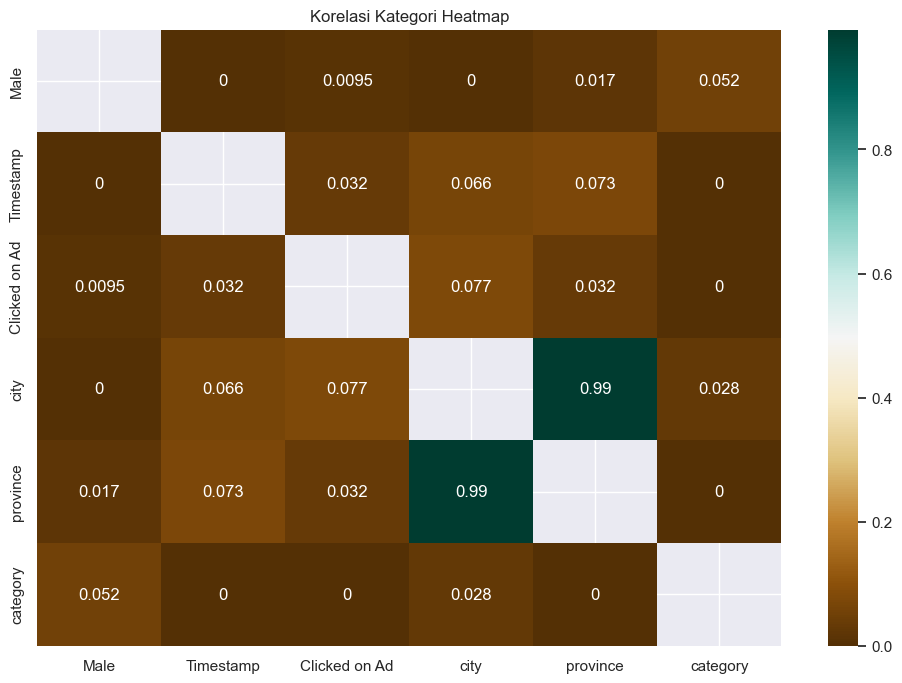

In [188]:
# Hitung Cramér's V untuk setiap pasangan variabel kategorikal
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_vars = df.select_dtypes(include=['object']).columns
corr_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            corr = cramers_v(var1, var2)
            corr_matrix.at[var1, var2] = corr
# Konversi matriks korelasi menjadi float
corr_matrix = corr_matrix.astype(float)

# Buat heatmap matriks korelasi kategori
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BrBG')
plt.title("Korelasi Kategori Heatmap")
plt.show()

Hasil Observasi

Dari hasil korelasi yang diperoleh melalui heatmap,  ditemukan fitur yang memiliki korelasi yang kuat (redundan) yaitu fitur city dengan province. Oleh karena itu, fitur city dan province tidak digunakan dalam pemodelan. 

Penggunaan internet harian memiliki korelasi positif yang tinggi (51%) dengan waktu harian yang dihabiskan di website. Artinya, semakin sering pengguna menggunakan internet, semakin lama mereka menghabiskan waktu di situs web.

Usia pengguna memiliki korelasi negatif dengan tiga fitur lainnya: pendapatan rata-rata geografis pengguna, waktu yang dihabiskan di website, dan penggunaan internet harian. Korelasi tertinggi adalah dengan penggunaan internet harian (37%). Hal ini menunjukkan bahwa semakin tua usia pengguna, semakin jarang mereka menggunakan internet harian.


## TASK 2 (Data Cleaning & Preprocessing)

In [189]:
df_1=df.copy()

In [190]:
df_1.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
267,267,72.44,34,493830120.0,230.14,Perempuan,4/15/2016 14:45,No,Tangerang Selatan,Banten,House
467,467,52.68,23,277312000.0,149.20,Laki-Laki,7/16/2016 5:56,Yes,Bogor,Jawa Barat,Furniture
486,486,83.97,40,464041690.0,158.42,Laki-Laki,2/2/2016 11:49,No,Palembang,Sumatra Selatan,House
67,67,35.33,32,360571260.0,200.22,Perempuan,6/5/2016 22:11,Yes,Tangerang Selatan,Banten,Otomotif
482,482,69.42,25,460538190.0,213.38,Perempuan,2/13/2016 4:16,No,Samarinda,Kalimantan Timur,Health


### Handling Missing Value 


In [191]:
missing_values=df_1.isnull().sum().sort_values(ascending=False)[:8]
missing_values

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Unnamed: 0                   0
Age                          0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [192]:
total_rows = len(df_1)
missing_percentage = (missing_values / total_rows) * 100
missing_percentage

Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Male                        0.3
Unnamed: 0                  0.0
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

Feature dengan missing value
- Daily Time Spent on Site sebanyak 13 data (1.3%)
- Area Income sebanyak 13 data (1.3%)
- Daily Internet Usage sebanyak 11 data (1.1%)
- Male sebanyak 3 data (0.3%).

In [193]:
# Mengisi nilai kosong dengan median pada feature numerik dan modus pada feature kategorik
df_1['Daily Time Spent on Site'].fillna(df_1['Daily Time Spent on Site'].median(),
                                          inplace = True)
df_1['Area Income'].fillna(df_1['Area Income'].median(),
                             inplace = True)
df_1['Daily Internet Usage'].fillna(df_1['Daily Internet Usage'].median(),
                                      inplace = True)
df_1['Male'].fillna(df_1['Male'].mode()[0], inplace=True)

In [194]:
missing_values=df_1.isnull().sum().sort_values(ascending=False)[:8]
missing_values

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Handling Duplicated Value

In [195]:
df_1.duplicated().sum()

0

###  Feature Engineering

#### Feature Extraction
Mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.


In [196]:
#check tipe data
df_1.Timestamp.dtype

dtype('O')

In [197]:
import datetime
df_1.Timestamp = pd.to_datetime(df_1.Timestamp)
df_1.Timestamp.dtype

dtype('<M8[ns]')

In [198]:
df_1['year']=df_1.Timestamp.dt.year
df_1['month']=df_1.Timestamp.dt.month
df_1['week']=df_1.Timestamp.dt.isocalendar().week
df_1['day']=df_1.Timestamp.dt.day  

In [199]:
print(df_1.year.dtype)
print(df_1.month.dtype)
print(df_1.week.dtype)
print(df_1.day.dtype)

int64
int64
UInt32
int64


In [200]:
df_1.week = df_1.week.astype('int64')

In [201]:
df_1.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,year,month,week,day
872,872,70.05,33,528924550.0,203.44,Perempuan,2016-03-24 17:48:00,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,House,2016,3,12,24
731,731,61.87,35,466407270.0,250.20,Laki-Laki,2016-07-10 19:15:00,No,Makassar,Sulawesi Selatan,Otomotif,2016,7,27,10
346,346,81.58,25,277893910.0,199.39,Perempuan,2016-05-11 22:02:00,No,Balikpapan,Kalimantan Timur,Electronic,2016,5,19,11
390,390,78.83,36,462354410.0,234.64,Laki-Laki,2016-05-08 12:08:00,No,Samarinda,Kalimantan Timur,Fashion,2016,5,18,8
718,718,68.95,51,522362890.0,185.85,Laki-Laki,2016-03-15 20:19:00,No,Balikpapan,Kalimantan Timur,Finance,2016,3,11,15


In [202]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  year                      1000 non-null   int64         
 12  month                

#### Feature Encoding

In [203]:
df_ecod=df_1.copy()

Melakukan label endcoding pada feature Gender dan Clicked on Ad,sedangkan untuk One Hot Endcoding pada feature Category. Untuk featur city and province tidak dilakukan One Hot Encoding, karena feature ini tidak digunakan dalam modeling, karna memiliki nilai korelasi yang tinggi, serta memiliki nilai unique banyak yang dapat menyebabkan kutukan dimensi yang dapat menyebabkan pengurangan performance model.

In [204]:
# Label Encoding 
df_ecod['Male'] = df_ecod['Male'].map({'Laki-Laki': 1,
                                         'Perempuan' : 0})
df_ecod['Clicked on Ad'] = df_ecod['Clicked on Ad'].map({'No' : 0,
                                                       'Yes' : 1})
df_ecod.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,year,month,week,day
76,76,49.81,35,399068320.0,120.06,1,2016-01-05 04:18:00,1,Samarinda,Kalimantan Timur,Otomotif,2016,1,1,5
668,668,52.56,31,232030330.0,250.36,1,2016-04-24 01:48:00,1,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance,2016,4,16,24
722,722,39.47,43,459032350.0,163.48,1,2016-07-06 23:09:00,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Finance,2016,7,27,6
358,358,51.38,59,296537430.0,158.56,0,2016-06-17 17:11:00,1,Palembang,Sumatra Selatan,House,2016,6,24,17
447,447,73.93,44,519260350.0,218.22,0,2016-02-20 00:06:00,0,Bandar Lampung,Lampung,Finance,2016,2,7,20


In [205]:
# One Hot Endcoding with get_dummy
df_ecod = pd.get_dummies(df_ecod, columns = ['category'])
df_ecod.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,year,month,week,day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
990,990,35.79,44,236691560.0,165.62,1,2016-04-20 13:36:00,1,Padang,Sumatra Barat,2016,4,16,20,0,0,0,0,1,0,0,0,0,0
423,423,58.03,31,198711940.0,129.33,0,2016-06-29 09:04:00,1,Tangerang,Banten,2016,6,26,29,0,0,0,0,0,0,0,0,1,0
931,931,61.76,34,234877300.0,114.69,0,2016-05-27 08:53:00,1,Bekasi,Jawa Barat,2016,5,21,27,0,1,0,0,0,0,0,0,0,0
777,777,72.18,30,486066280.0,225.02,0,2016-06-10 22:21:00,0,Denpasar,Bali,2016,6,23,10,0,0,0,0,0,0,0,0,0,1
30,30,67.64,35,360312960.0,267.01,1,2016-07-02 20:23:00,0,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,2016,7,26,2,0,0,0,0,0,0,0,1,0,0


### Feature Selection
Feature yang tidak digunakan untuk pemodelan adalah 
- "Unnamed: 0" (kolom yang hanya berisi nomor pelanggan unik dan tidak berpengaruh pada target)
- "city" dan "province"  (memiliki nilai unik yang banyak)
- "Timestamp" (karena sudah dilakukan extraction sehingga timestamp di hapus)

In [206]:
df_mod=df_ecod.copy()

In [207]:
# Menghapus kolom 'Unnamed: 0', 'city', dan 'province' dari DataFrame df
df_mod.drop(['Unnamed: 0', 'Timestamp','city', 'province'], axis=1, inplace=True)

In [208]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   year                      1000 non-null   int64  
 7   month                     1000 non-null   int64  
 8   week                      1000 non-null   int64  
 9   day                       1000 non-null   int64  
 10  category_Bank             1000 non-null   uint8  
 11  category_Electronic       1000 non-null   uint8  
 12  category_Fashion          1000 non-null   uint8  
 13  category_Finance          1000 non-null   uint8  
 14  category_

### Split data menjadi Feature dan Target

In [209]:
# Define x_data1 and y_data1 for model 1
x_data1 = df_mod.drop('Clicked on Ad', axis = 1)
y_data1 = df_mod['Clicked on Ad']

In [210]:
# Define x_data and y_data for model 2
x_data2 = df_mod.drop('Clicked on Ad', axis = 1)
y_data2 = df_mod[['Clicked on Ad']]


# Standardisation of Data for model 2
cols = x_data2.columns
for i in range(0, len(cols)):
  x_data2[cols[i]] = StandardScaler().fit_transform(x_data2[cols[i]].values.reshape(len(x_data2), 1))

### TASK 3 (Data Modeling)

### Split data train dan data test

In [211]:
#data train: 80%, data test: 20% for model1
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size = 0.2, random_state = 42)

#data train : 80%, data test : 20% for model2
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size = 0.2, random_state = 42)
     

In [212]:
# check number of data train and data test: just one model
print('Split into 80 : 20')
print('Total rows & columns of train set:', x_train1.shape)
print('Total rows & columns of test set:', x_test1.shape)

Split into 80 : 20
Total rows & columns of train set: (800, 19)
Total rows & columns of test set: (200, 19)


### Modeling

In [213]:
# Function for Metric Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, y_pred_train, y_test_pred, y_train, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("F1 Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1 Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.set(font_scale = 1)
    ax = sns.heatmap(cf_matrix, annot = True, fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize = 14)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

#### Before Standardization

##### **Logistic Regression**

In [214]:
from sklearn.linear_model import LogisticRegression

logreg_1 = LogisticRegression(random_state = 42)
logreg_1.fit(x_train1, y_train1)

y_pred_train = logreg_1.predict(x_train1)
y_pred = logreg_1.predict(x_test1)

eval_classification(logreg_1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.45
Accuracy (Train Set): 0.51
Recall (Test Set): 0.00
Recall (Train Set): 0.00
Precision (Test Set): 0.00
Precision (Train Set): 0.00
F1 Score (Test Set): 0.00
F1 Score (Train Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
# hyperparamater tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [1, 5, 10],
                       solver=['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'])

logreg_1 = LogisticRegression(random_state=1)
logreg_1_tuned = RandomizedSearchCV(logreg_1, hyperparameters, cv=5, scoring='recall',random_state=1)
logreg_1_tuned.fit(x_train1, y_train1)

y_train_pred = logreg_1_tuned.predict(x_train1)
y_pred = logreg_1_tuned.predict(x_test1)

eval_classification(logreg_1_tuned, y_train_pred, y_pred, y_train1, y_test1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\User

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.98
Recall (Test Set): 0.93
Recall (Train Set): 0.97
Precision (Test Set): 0.96
Precision (Train Set): 0.98
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.94


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


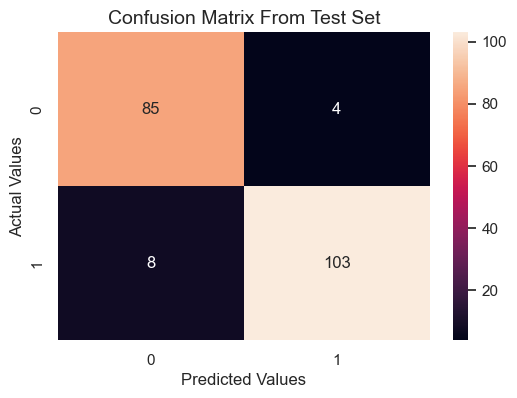

In [216]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

##### **Decision Tree**

In [217]:
from sklearn.tree import DecisionTreeClassifier

dt_1 = DecisionTreeClassifier(random_state = 42)
dt_1.fit(x_train1, y_train1)

y_pred_train = dt_1.predict(x_train1)
y_pred = dt_1.predict(x_test1)

eval_classification(dt_1, y_pred_train, y_pred, y_train1, y_test1)
     

Accuracy (Test Set): 0.91
Accuracy (Train Set): 1.00
Recall (Test Set): 0.92
Recall (Train Set): 1.00
Precision (Test Set): 0.92
Precision (Train Set): 1.00
F1 Score (Test Set): 0.92
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.91


In [218]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split=[2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt_1 = DecisionTreeClassifier(random_state=1)
dt_1_tuned = RandomizedSearchCV(dt_1, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_1_tuned.fit(x_train1, y_train1)

y_train_pred = dt_1_tuned.predict(x_train1)
y_pred = dt_1_tuned.predict(x_test1)

eval_classification(dt_1_tuned, y_train_pred, y_pred, y_train1, y_test1)
     

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASU

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.95
Recall (Test Set): 0.92
Recall (Train Set): 0.95
Precision (Test Set): 0.93
Precision (Train Set): 0.95
F1 Score (Test Set): 0.92
F1 Score (Train Set): 0.95
AUC (Train Set): 0.95
AUC (Test Set): 0.91


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


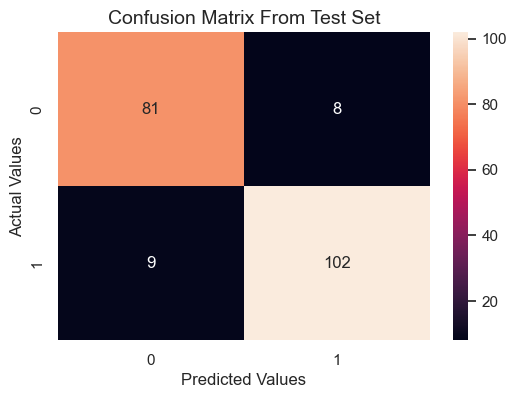

In [219]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

##### **Random Forest**

In [220]:
from sklearn.ensemble import RandomForestClassifier
     
rf_1 = RandomForestClassifier(random_state = 42)
rf_1.fit(x_train1, y_train1)

y_pred_train = rf_1.predict(x_train1)
y_pred = rf_1.predict(x_test1)

eval_classification(rf_1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Recall (Test Set): 0.95
Recall (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.93


In [221]:

from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 3],
                       min_samples_leaf = [1, 3],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf_1 = RandomForestClassifier(random_state = 42)
rf_1_tuned = GridSearchCV(rf_1, hyperparameters, cv = 5, scoring = 'recall')
rf_1_tuned.fit(x_train1,y_train1)

y_pred_train = rf_1_tuned.predict(x_train1)
y_pred = rf_1_tuned.predict(x_test1)

eval_classification(rf_1_tuned, y_pred_train, y_pred, y_train1, y_test1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.96
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.94


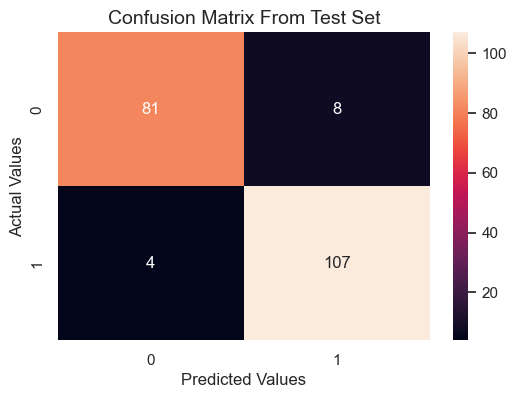

In [222]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

##### **Adaboost**

In [223]:
from sklearn.ensemble import AdaBoostClassifier
     
ada_1 = AdaBoostClassifier(random_state = 42)
ada_1.fit(x_train1, y_train1)

y_pred_train = ada_1.predict(x_train1)
y_pred = ada_1.predict(x_test1)

eval_classification(ada_1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.94


In [224]:
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 2],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}


ada_1 = AdaBoostClassifier(random_state=42)
ada_1_tuned = GridSearchCV(ada_1, hyperparameters, scoring='recall', cv=5)
ada_1_tuned.fit(x_train1, y_train1)

y_pred_train = ada_1_tuned.predict(x_train1)
y_pred = ada_1_tuned.predict(x_test1)

eval_classification(ada_1_tuned, y_pred_train, y_pred, y_train1, y_test1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-package

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.93
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.95


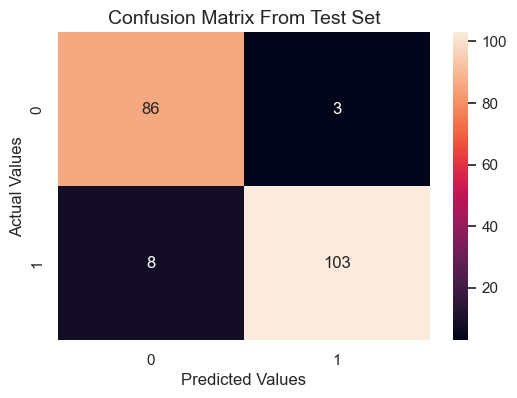

In [225]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

##### **Gradient Boosting**

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
     
grad_1 = GradientBoostingClassifier(random_state = 42)
grad_1.fit(x_train1, y_train1)

y_pred_train = grad_1.predict(x_train1)
y_pred = grad_1.predict(x_test1)

eval_classification(grad_1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.93


In [227]:
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 20)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1,2,3],
                       min_samples_leaf = [1,2,3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad_1 = GradientBoostingClassifier(random_state = 42)
grad_1_tuned = GridSearchCV(grad_1, hyperparameters, cv = 5, scoring = 'recall')
grad_1_tuned.fit(x_train1, y_train1)

y_pred_train = grad_1_tuned.predict(x_train1)
y_pred = grad_1_tuned.predict(x_test1)

eval_classification(grad_1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.98
Recall (Test Set): 0.94
Recall (Train Set): 0.97
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.92


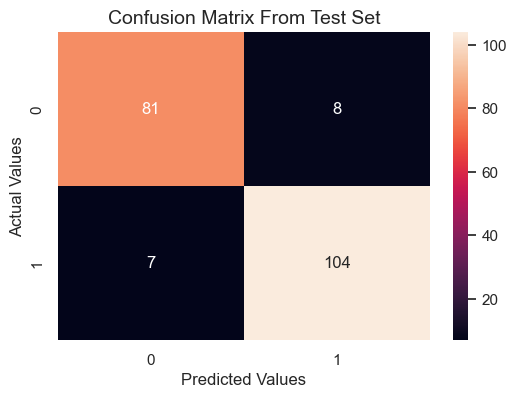

In [228]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

#### After Standardization

##### **Logistic Regression**

In [229]:
logreg_2 = LogisticRegression(random_state = 42)
logreg_2.fit(x_train2, y_train2)

y_pred_train = logreg_2.predict(x_train2)
y_pred = logreg_2.predict(x_test2)

eval_classification(logreg_2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.97
Recall (Test Set): 0.95
Recall (Train Set): 0.97
Precision (Test Set): 0.96
Precision (Train Set): 0.98
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.95


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
# hyperparamater tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [1, 5, 10],
                       solver=['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'])

logreg_2 = LogisticRegression(random_state=1)
logreg_2_tuned = RandomizedSearchCV(logreg_2, hyperparameters, cv=5, scoring='recall',random_state=1)
logreg_2_tuned.fit(x_train2, y_train2)

y_train_pred = logreg_2_tuned.predict(x_train2)
y_pred = logreg_2_tuned.predict(x_test2)

eval_classification(logreg_2_tuned, y_train_pred, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.98
Recall (Test Set): 0.95
Recall (Train Set): 0.97
Precision (Test Set): 0.96
Precision (Train Set): 0.98
F1 Score (Test Set): 0.96
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.96


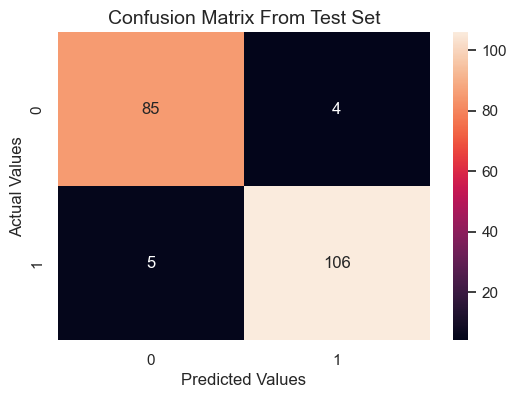

In [231]:
# confusion matrix : hyperparameter tuning
cfm(y_test2,y_pred)

##### **Decision Tree**

In [232]:
dt_2 = DecisionTreeClassifier(random_state = 42)
dt_2.fit(x_train2, y_train2)

y_pred_train = dt_2.predict(x_train2)
y_pred = dt_2.predict(x_test2)

eval_classification(dt_2, y_pred_train, y_pred, y_train2, y_test2)
     

Accuracy (Test Set): 0.91
Accuracy (Train Set): 1.00
Recall (Test Set): 0.92
Recall (Train Set): 1.00
Precision (Test Set): 0.92
Precision (Train Set): 1.00
F1 Score (Test Set): 0.92
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.91


In [233]:
hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split=[2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt_2 = DecisionTreeClassifier(random_state=1)
dt_2_tuned = RandomizedSearchCV(dt_2, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_2_tuned.fit(x_train2, y_train2)

y_train_pred = dt_2_tuned.predict(x_train2)
y_pred = dt_2_tuned.predict(x_test2)

eval_classification(dt_2_tuned, y_train_pred, y_pred, y_train2, y_test2)
     

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ASU

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.95
Recall (Test Set): 0.92
Recall (Train Set): 0.95
Precision (Test Set): 0.93
Precision (Train Set): 0.95
F1 Score (Test Set): 0.92
F1 Score (Train Set): 0.95
AUC (Train Set): 0.95
AUC (Test Set): 0.91


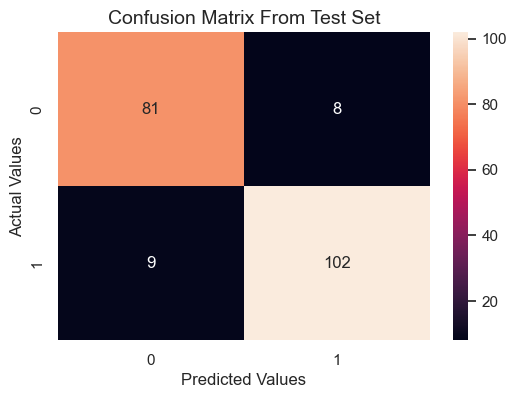

In [234]:
# confusion matrix : hyperparameter tuning
cfm(y_test2,y_pred)

##### **Random Forest**

In [235]:
rf_2 = RandomForestClassifier(random_state = 42)
rf_2.fit(x_train2, y_train2)

y_pred_train = rf_2.predict(x_train2)
y_pred = rf_2.predict(x_test2)

eval_classification(rf_2, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18372\1630400024.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_2.fit(x_train2, y_train2)


Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Recall (Test Set): 0.95
Recall (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.93


In [236]:

hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 3],
                       min_samples_leaf = [1, 3],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf_2 = RandomForestClassifier(random_state = 42)
rf_2_tuned = GridSearchCV(rf_2, hyperparameters, cv = 5, scoring = 'recall')
rf_2_tuned.fit(x_train2,y_train2)

y_pred_train = rf_2_tuned.predict(x_train2)
y_pred = rf_2_tuned.predict(x_test2)

eval_classification(rf_2_tuned, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.96
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.94


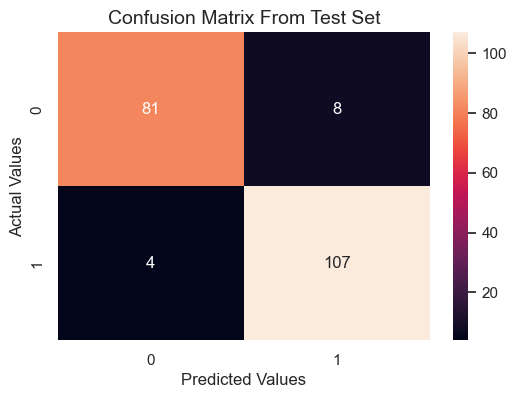

In [237]:
# confusion matrix : hyperparameter tuning
cfm(y_test2,y_pred)

##### **Adaboost**

In [238]:
from sklearn.ensemble import AdaBoostClassifier
     
ada_2 = AdaBoostClassifier(random_state = 42)
ada_2.fit(x_train2, y_train2)

y_pred_train = ada_2.predict(x_train2)
y_pred = ada_2.predict(x_test2)

eval_classification(ada_2, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.94


In [239]:
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 2],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}


ada_2 = AdaBoostClassifier(random_state=42)
ada_2_tuned = GridSearchCV(ada_2, hyperparameters, scoring='recall', cv=5)
ada_2_tuned.fit(x_train2, y_train2)

y_pred_train = ada_2_tuned.predict(x_train2)
y_pred = ada_2_tuned.predict(x_test2)

eval_classification(ada_2_tuned, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConver

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.93
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.95


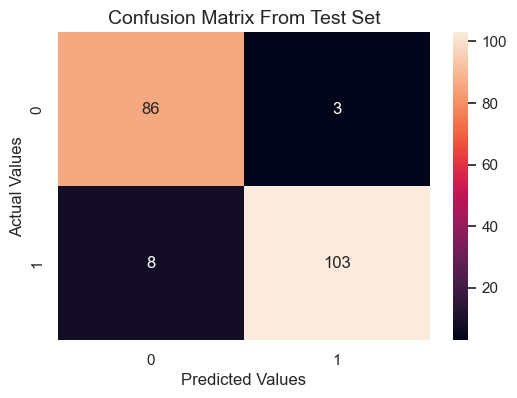

In [240]:
# confusion matrix : hyperparameter tuning
cfm(y_test2,y_pred)

##### **Gradient Boosting**

In [241]:
from sklearn.ensemble import GradientBoostingClassifier
     
grad_2 = GradientBoostingClassifier(random_state = 42)
grad_2.fit(x_train2, y_train2)

y_pred_train = grad_2.predict(x_train2)
y_pred = grad_2.predict(x_test2)

eval_classification(grad_2, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.93


In [242]:
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 10)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1,2,3],
                       min_samples_leaf = [1,2,3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad_2 = GradientBoostingClassifier(random_state = 42)
grad_2_tuned = GridSearchCV(grad_2, hyperparameters, cv = 5, scoring = 'recall')
grad_2_tuned.fit(x_train2, y_train2)

y_pred_train = grad_2_tuned.predict(x_train2)
y_pred = grad_2_tuned.predict(x_test2)

eval_classification(grad_2_tuned, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.98
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.92


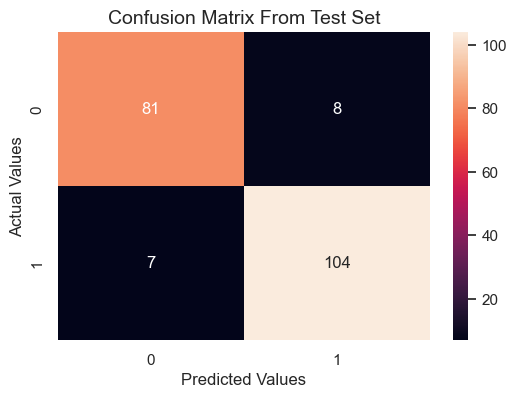

In [243]:
# confusion matrix : hyperparameter tuning
cfm(y_test2,y_pred)

### Result Modeling Experiment Without Standardization

In [268]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = logreg_1_tuned
models_dict["Decision Tree"] = dt_1_tuned
models_dict["Random Forest"] = rf_1_tuned
models_dict["Adaboost"] = ada_1_tuned
models_dict["Gradient Boosting"] = grad_1_tuned

In [269]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(x_test1)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(x_train1)
    train_prediction_results.append(model_pred_train)

Model on Logistic Regression
Model on Decision Tree
Model on Random Forest
Model on Adaboost
Model on Gradient Boosting


In [270]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train1, y_pred))
    recall_train.append(recall_score(y_train1, y_pred))
    accuracy_train.append(accuracy_score(y_train1, y_pred))
    confusion_m_train.append(confusion_matrix(y_train1, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test1, y_pred))
    recall_test.append(recall_score(y_test1, y_pred))
    accuracy_test.append(accuracy_score(y_test1, y_pred))
    confusion_m_test.append(confusion_matrix(y_test1, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
}
df_results1 = pd.DataFrame(data = eval_dict)
df_results1 = df_results1.set_index("model")
df_results1

,Recall_test,Recall_train,Accuracy_test,Accuracy_train
model,,,,
Logistic Regression,0.927928,0.966581,0.940,0.97625
Decision Tree,0.918919,0.946015,0.915,0.95000
Random Forest,0.963964,0.964010,0.940,0.97750
Adaboost,0.927928,0.979434,0.945,0.99000
Gradient Boosting,0.936937,0.974293,0.925,0.98500


- Sebagian besar model menunjukkan hasil kinerja yang serupa antara data uji dan data latih, yang menandakan bahwa tidak terdapat perbedaan yang signifikan yang mengindikasikan overfitting atau underfitting
- Dari hasil pemodelan pada data uji, nilai recall lebih tinggi pada model Random Forest dan Gradient Boosting.
- Selain akurasi, hasil recall pada data uji juga menunjukkan hasil yang lebih baik pada model Gradient Boosting.


### Result Modeling Experiment With Standardization

In [271]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = logreg_2_tuned
models_dict["Decision Tree"] = dt_2_tuned
models_dict["Random Forest"] = rf_2_tuned
models_dict["Adaboost"] = ada_2_tuned
models_dict["Gradient Boosting"] = grad_2_tuned

In [272]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(x_test2)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(x_train2)
    train_prediction_results.append(model_pred_train)

Model on Logistic Regression
Model on Decision Tree
Model on Random Forest
Model on Adaboost
Model on Gradient Boosting


In [273]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train2, y_pred))
    recall_train.append(recall_score(y_train2, y_pred))
    accuracy_train.append(accuracy_score(y_train2, y_pred))
    confusion_m_train.append(confusion_matrix(y_train2, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test2, y_pred))
    recall_test.append(recall_score(y_test2, y_pred))
    accuracy_test.append(accuracy_score(y_test2, y_pred))
    confusion_m_test.append(confusion_matrix(y_test2, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
}
df_results2 = pd.DataFrame(data = eval_dict)
df_results2 = df_results2.set_index("model")
df_results2

,Recall_test,Recall_train,Accuracy_test,Accuracy_train
model,,,,
Logistic Regression,0.954955,0.969152,0.955,0.97625
Decision Tree,0.918919,0.946015,0.915,0.95000
Random Forest,0.963964,0.964010,0.940,0.97750
Adaboost,0.927928,0.979434,0.945,0.99000
Gradient Boosting,0.936937,0.976864,0.925,0.98625


- Terjadi peningkatan pada model, hal nni menunjukkan bahwa penggunaan Min-Max Scaler telah memberikan dampak positif pada performa model.
- Terjadi perubahan dalam hasil kinerja terbaik, di mana hasil akurasi tes tertinggi ditemukan pada model Random Forest dan Gradient Boosting. Hal ini menunjukkan bahwa kedua model tersebut adalah yang terbaik dalam memprediksi data uji setelah dilakukan normalisasi/standarisasi. Di pilih model Random Forest karena nilai recal antara train dan test gapnya lebih dekat dari pada yang Gradient Boosting. 

#### Selected Model 

In [250]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x_test1.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(6, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### Random Forest

In [251]:
hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 3],
                       min_samples_leaf = [1, 3],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf_2 = RandomForestClassifier(random_state = 42)
rf_2_tuned = GridSearchCV(rf_2, hyperparameters, cv = 5, scoring = 'recall')
rf_2_tuned.fit(x_train2,y_train2)

y_pred_train = rf_2_tuned.predict(x_train2)
y_pred = rf_2_tuned.predict(x_test2)

eval_classification(rf_2_tuned, y_pred_train, y_pred, y_train2, y_test2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.96
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.94


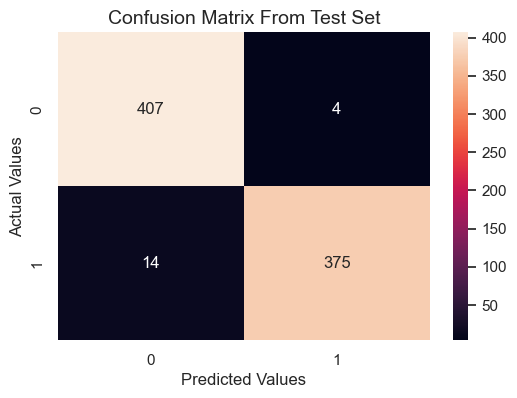

In [356]:
cfm(y_train2, y_pred_train)

## TASK 4 (Business Recommendation and Simulation)

### Hubungkan hasil dari EDA dan feature important sebagai bahan kajian rekomendasi bisnis.

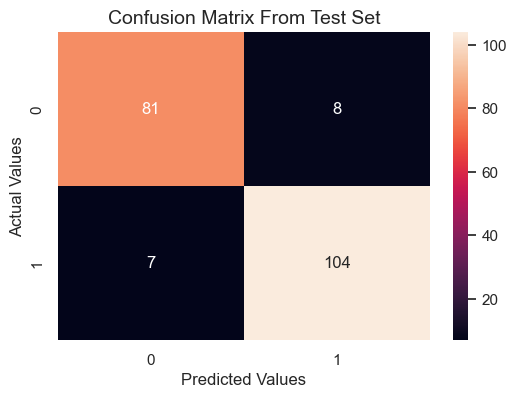

In [357]:
cfm(y_test2, y_pred)

Recall mengukur rasion antara jumlah user yang diprediksi mengklik iklan dan benar-benar mengklik iklan. dengan jumlah user  yang diprediksi tidak mengklik iklan tetapi ada kenyatannya mengklik iklan. Memaksimalkan recall ini akan meminimalkan jumlah user yang salah prediksi akan mengklik iklan.

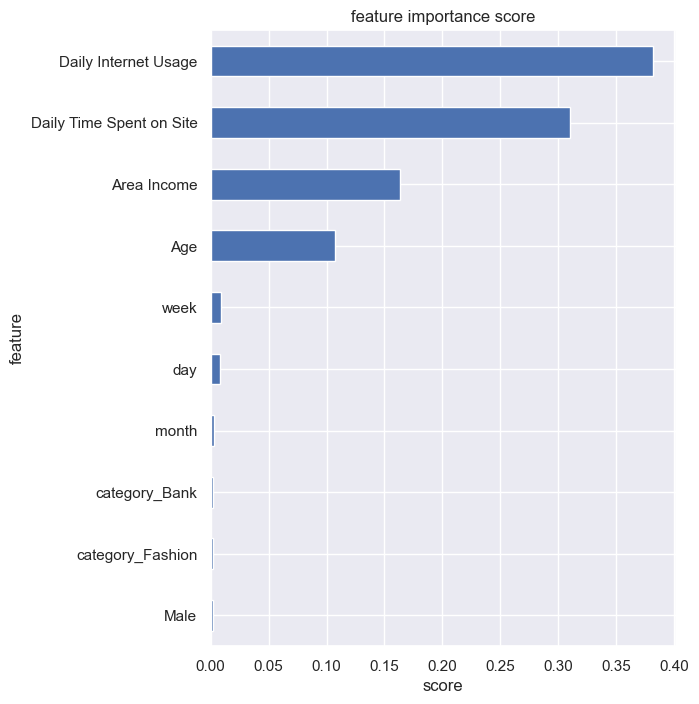

In [256]:
show_feature_importance(rf_2_tuned)

In [262]:
!pip install shap

     ------------------------------------ 447.3/447.3 kB 394.1 kB/s eta 0:00:00


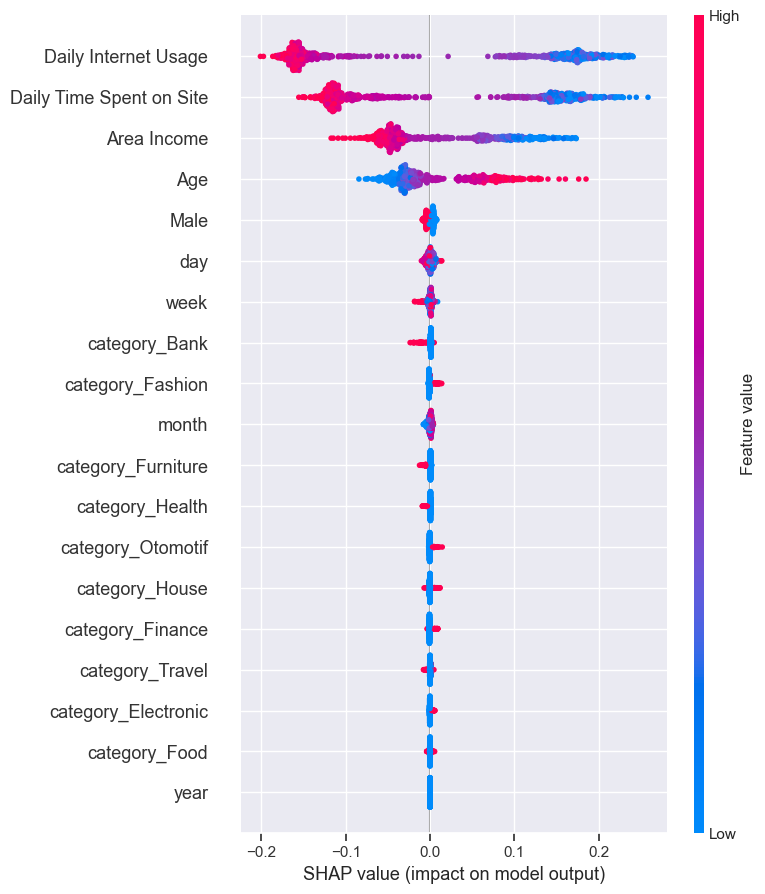

In [267]:
import shap
best_rf_model = rf_2_tuned.best_estimator_

shap_values = shap.TreeExplainer(model=best_rf_model).shap_values(x_train2)

shap.summary_plot(shap_values[1], x_train2)

Berdasarkan model yagn digunakan, terdapat 2 feature yang paling berpengaruh yaitu Daily Internet Usage dan Dailt Time Spent on Site.

Semakin rendah Daily Internet Usage, maka semakin banyak user mengklik iklan, sedangkan semakin tinggi Daily Internet Usage, maka semakin sedikit user mengklik iklan.
Begitu pun dengan Daily Time Spent on Site. Semakin rendah Daily Time Spent on Site, maka semakin banyak user mengklik iklan, sedangkan semakin tinggi Daily Time Spent on Site, maka semakin sedikit user mengklik iklan.

Selain itu terdapat feature yang lain yang mempengaruhi yaitu Area Income, semaking tinggi area income, semakin tinggi area income user, semakin cenderung untuk tidak mengklik iklan. 


### Recommedation Bussines

In [279]:
df_final = df_1.copy()
df_final.shape

(1000, 15)

In [281]:
df_final.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,year,month,week,day
662,662,48.26,50,305015620.0,122.45,Laki-Laki,2016-06-18 22:31:00,Yes,Balikpapan,Kalimantan Timur,Bank,2016,6,24,18
253,253,46.08,30,467493670.0,164.63,Laki-Laki,2016-07-21 10:54:00,Yes,Denpasar,Bali,Food,2016,7,29,21
620,620,81.75,24,368592910.0,190.08,Perempuan,2016-04-29 18:53:00,No,Bogor,Jawa Barat,Electronic,2016,4,17,29
21,21,84.59,35,420108990.0,226.54,Laki-Laki,2016-03-18 13:22:00,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel,2016,3,11,18
573,573,74.59,23,280945420.0,158.35,Laki-Laki,2016-02-15 16:52:00,Yes,Tangerang,Banten,Finance,2016,2,7,15


In [289]:
#Mengelompokan usia
def age_group(x):
    if x['Age'] > 54:
        return 'Senior'
    elif 45 < x['Age'] <= 54:
        return 'Pre-Senior'
    elif 35 < x['Age'] <= 45:
        return 'Middle-Aged'
    elif 25 < x['Age'] <= 35:
        return 'Young Professional'
    elif 15 < x['Age'] <= 25:
        return 'Teen'

df_final['age_group'] = df_final.apply(lambda x: age_group(x), axis=1)

In [307]:
df_final[['Age','age_group']].sample(5)

,Age,age_group
896,32,Young Professional
960,28,Young Professional
392,28,Young Professional
590,25,Teen
499,37,Middle-Aged


In [340]:
dfg = df_final.groupby(['Clicked on Ad', 'age_group']).agg({
    'Daily Internet Usage': ['count', 'mean'],
    'Daily Time Spent on Site': ['mean'],
    'Area Income': 'mean' 
}).reset_index()


dfg.columns = ['clicked', 'age_group', 'total', 'avg_daily_internet_usage', 'avg_time_spent', 'avg_area_income']


dfg = dfg.sort_values(['clicked', 'avg_daily_internet_usage'], ascending=[False, False])
dfg

,clicked,age_group,total,avg_daily_internet_usage,avg_time_spent,avg_area_income
7,Yes,Teen,21,161.460476,61.531905,3.241209e+08
6,Yes,Senior,26,158.625769,60.204615,3.311708e+08
8,Yes,Young Professional,131,151.149313,53.508092,3.394388e+08
5,Yes,Pre-Senior,117,146.557179,52.068974,3.346278e+08
4,Yes,Middle-Aged,205,138.329659,52.133024,3.478372e+08
1,No,Pre-Senior,14,226.681429,76.118571,3.918476e+08
0,No,Middle-Aged,116,217.061121,78.691897,4.563433e+08
3,No,Young Professional,293,215.139932,77.138430,4.327065e+08
2,No,Teen,77,203.706104,71.805195,3.831568e+08


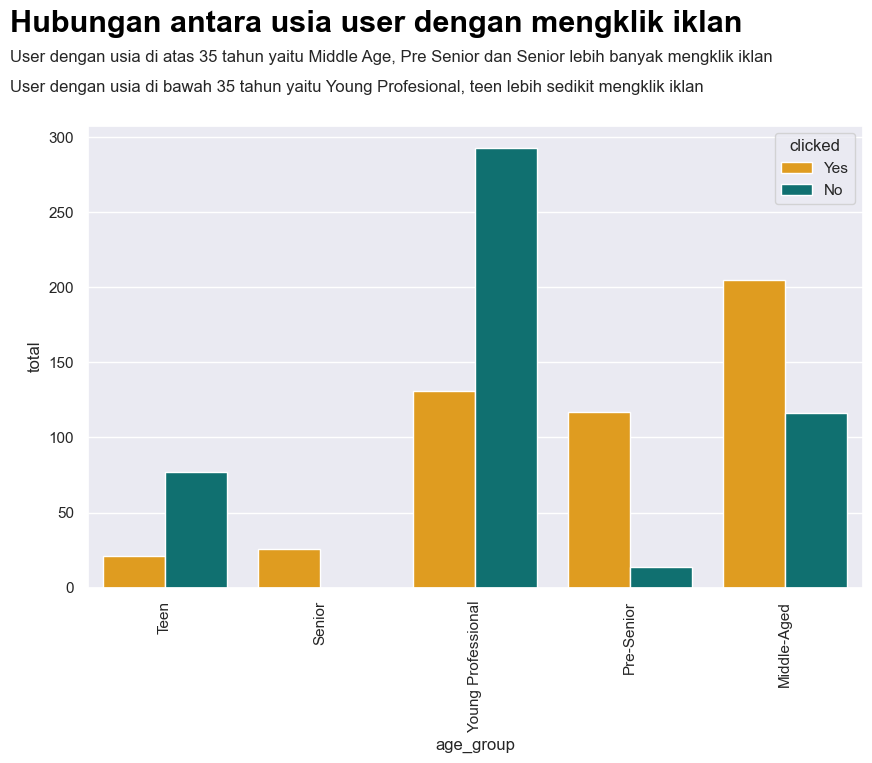

In [341]:
plt.figure(figsize=(10,6))

sns.set_palette(['orange', 'teal'])

sns.barplot(x='age_group', y='total', hue='clicked', data=dfg)
plt.text(x=-1, y=370, s='Hubungan antara usia user dengan mengklik iklan',fontsize=22, color='black', weight='bold')
plt.text(x=-1, y=350, s='User dengan usia di atas 35 tahun yaitu Middle Age, Pre Senior dan Senior lebih banyak mengklik iklan')
plt.text(x=-1, y=330, s='User dengan usia di bawah 35 tahun yaitu Young Profesional, teen lebih sedikit mengklik iklan')
plt.xticks(rotation=90)
plt.show()

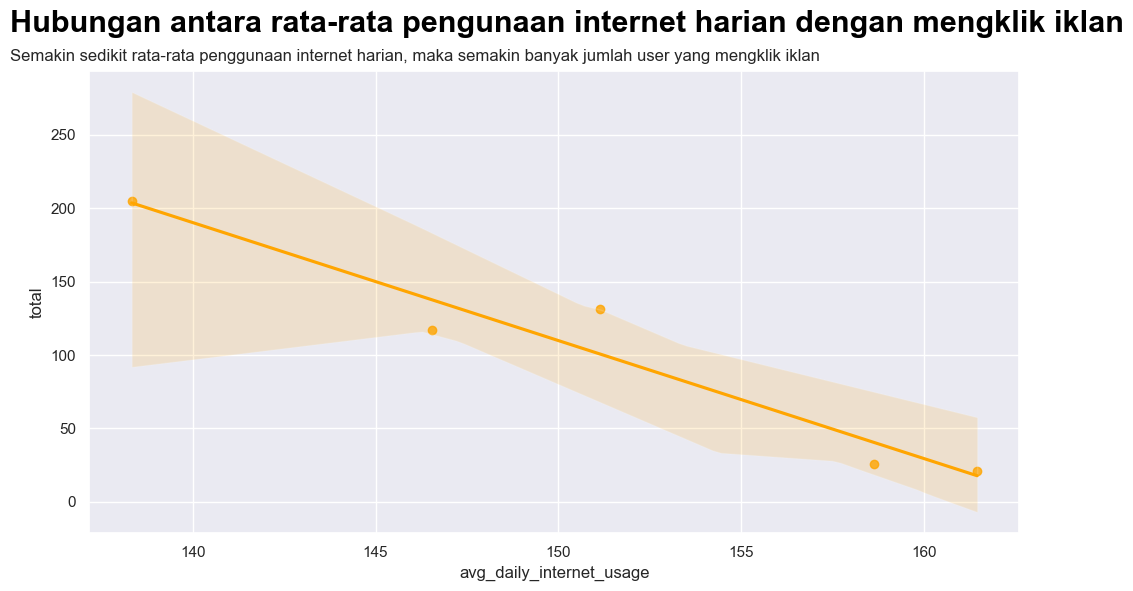

In [342]:
plt.figure(figsize=(12,6))
sns.regplot(y='total',x='avg_daily_internet_usage',data=dfg[dfg['clicked']=='Yes'])
plt.text(x=135,y=320,s='Hubungan antara rata-rata pengunaan internet harian dengan mengklik iklan',fontsize=22, color='black', weight='bold')
plt.text(x=135,y=300,s='Semakin sedikit rata-rata penggunaan internet harian, maka semakin banyak jumlah user yang mengklik iklan')
plt.show()

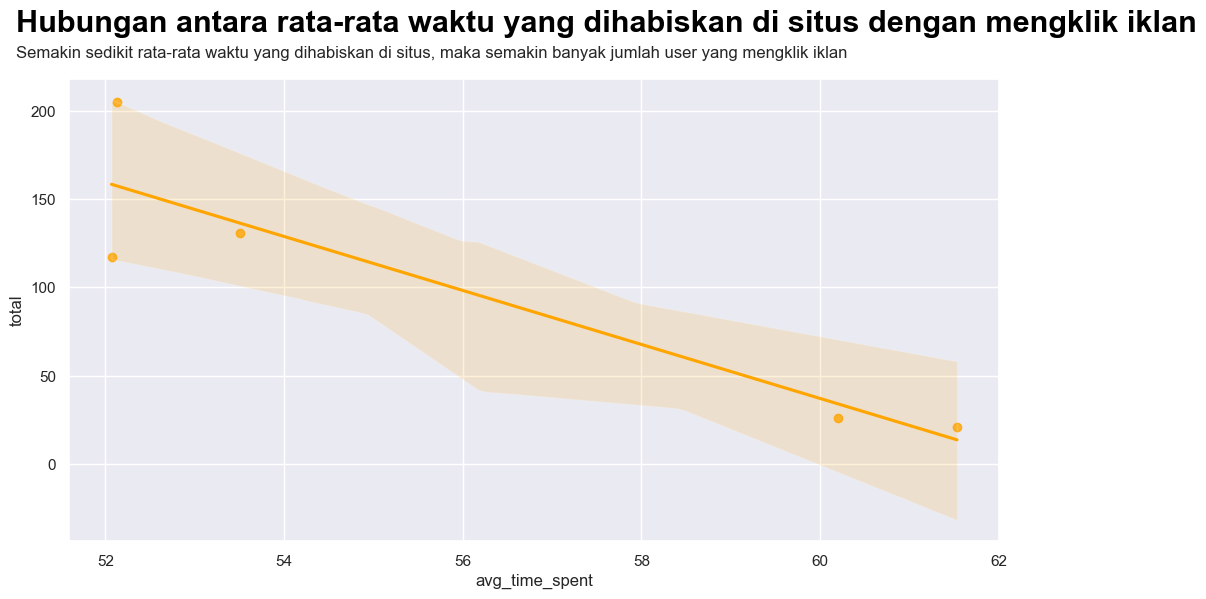

In [343]:
plt.figure(figsize=(12,6))
sns.regplot(y='total',x='avg_time_spent',data=dfg[dfg['clicked']=='Yes'])
plt.text(x=51,y=245,s='Hubungan antara rata-rata waktu yang dihabiskan di situs dengan mengklik iklan',fontsize=22, color='black', weight='bold')
plt.text(x=51,y=230,s='Semakin sedikit rata-rata waktu yang dihabiskan di situs, maka semakin banyak jumlah user yang mengklik iklan')
plt.show()

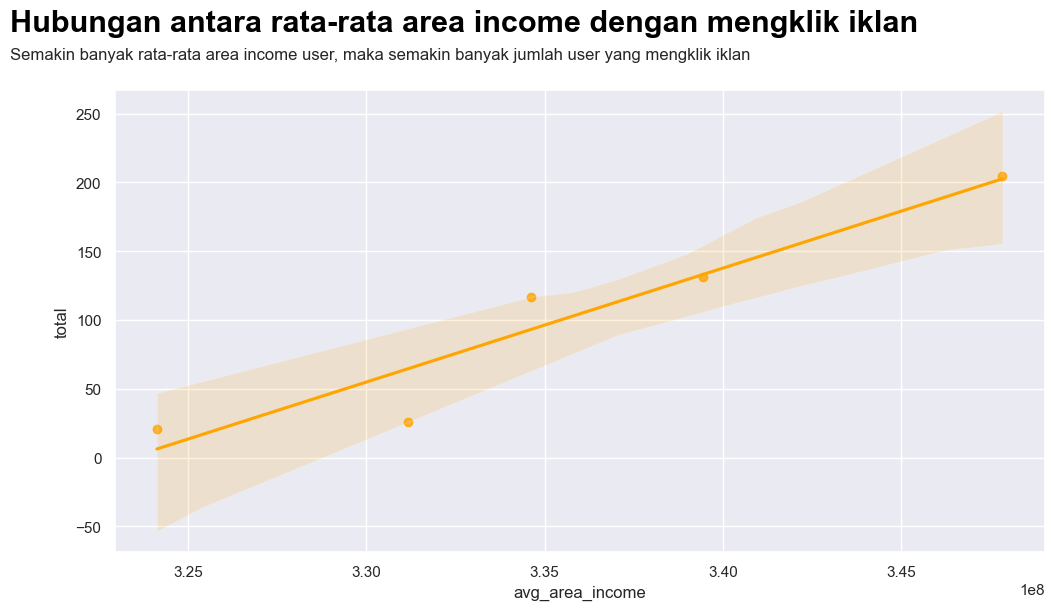

In [353]:
plt.figure(figsize=(12,6))
sns.regplot(y='total',x='avg_area_income',data=dfg[dfg['clicked']=='Yes'])
plt.text(x=320000000,y=310,s='Hubungan antara rata-rata area income dengan mengklik iklan',fontsize=22, color='black', weight='bold')
plt.text(x=320000000,y=290,s='Semakin banyak rata-rata area income user, maka semakin banyak jumlah user yang mengklik iklan')
plt.show()

Dari data yang diperoleh, terdapat 2 segmen user, yaitu segmen user aktif dan non aktif.
User aktif memiliki karakteristik dengan usia di bawah 35 tahun yaitu masuk dalam grup teen dan young profesional,  memiliki penggunaan internet yang tinggi, serta banyak menghabiskan waktu di situs, memiliki pendapatan yang lebih rendah. 

Sementara user non aktif memiliki karakteristik usia di atas 35 tahun yaitu grup Middle Age, Pre Senior dan Senior, memiliki penggunaan internet rendah yang mempengaruhi waktu yang dihabiskan di situs juga rendah, serta memiliki pendapatan yang lebih tinggi.  User non-aktif cenderung untuk mengklik iklan  dibandingkan dengan user aktif. 




#### Recommendation Business

**Penyesuaian Strategi Periklanan**

Untuk pengguna aktif (usia di bawah 35 tahun), perusahaan dapat fokus pada iklan yang menarik bagi mereka, seperti penawaran khusus, promosi, atau iklan yang lebih interaktif.
Untuk pengguna non-aktif (usia di atas 35 tahun), perusahaan dapat menggunakan pendekatan iklan yang lebih informatif, menekankan kualitas produk atau layanan, dan menawarkan solusi yang relevan.


**Pengelolaan Iklan**

Mengelola frekuensi dan jumlah iklan yang ditampilkan kepada pengguna aktif. Terlalu banyak iklan dapat membuat mereka merasa terganggu dan mengurangi respons positif terhadap iklan.




### Buatlah simulasi bisnis dengan tanpa menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut.
Hint: Jumlah user dan biaya pemasaran pada simulasi pertama dan kedua harus sama, perhatikan conversion rate yang terdampak pada revenue dan profit 

**Sebelum Menggunakan Machine Learning**

Asumsi:

Total user = 1000
Cost Ads/user= Rp. 1.000.
Dataset Awal 
Yes : 500
No : 500

Revenue/user jika conversi = Rp.5000

Tanpa Model Machine Learning.

Perhitungan Biaya:

Cost = Cost Ads * Total User

Cost = Rp. 1.000 * 1.000

Cost = Rp. 1.000.000

Conversion = 50% (500 user)

Karena hanya ada 500 yang berkonversi, kita akan mendapatkan 500 * Rp. 5.000 = Rp. 2.500.000

Revenue = Rp. 2.500.000

Profit= Revenue-Cost

Profit = Rp. 2.500.000 - Rp. 1.000.000 

Profit = Rp. 1.500.000

Berdasarkan simulasi di atas, jika kita tidak menggunakan model machine learning, kita akan mendapatkan Profit sebesar Rp. 1.500.000
